In [2]:
%load_ext IPython.extensions.autoreload
%autoreload 2

In [1]:
import sys
sys.path.append('../..')
from model import FinData
from model import merged_split
from model import CatboostFinModel
from model import train_valid_test_split

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

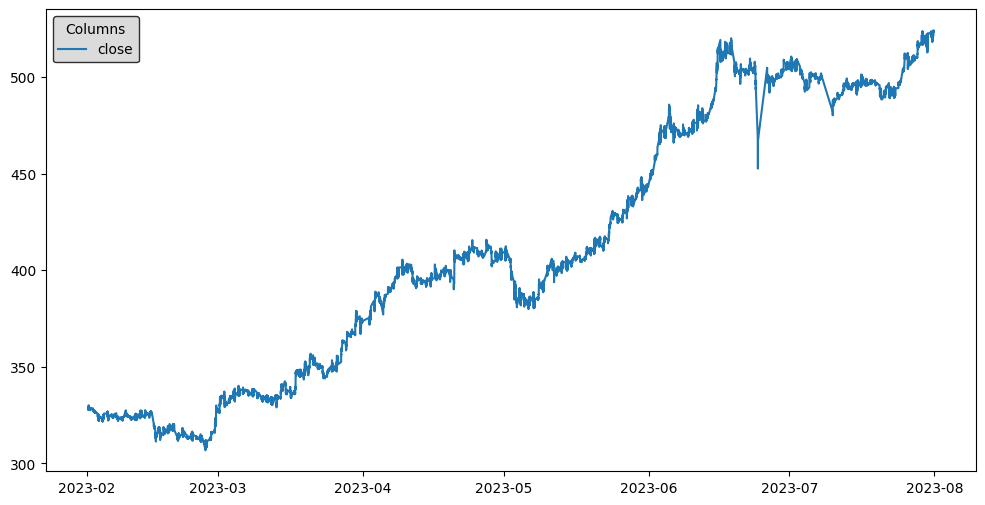

In [4]:
data = FinData("../../datasets/Sber_10_min.csv")
data.visualize_time_frame(datetime_start=dt.datetime(2023, 2, 1), 
                          datetime_end=dt.datetime(2023, 8, 1), 
                          columns=["close"])

In [5]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]

data = FinData("../../datasets/T_yandex_10min.csv")

data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()
data.insert_hull_moving_average()

num = data.numeric_features

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'hma_{i}'] = hma.rolling(window=sqrt_length).mean()
c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'close_normed_hma_{i}'] = self.df['close'] / self.df[f'hma_{i}']


In [6]:
X_train, X_val, y_train, y_val = merged_split(data=data.df, 
                                              start_data=dt.datetime(2023, 2, 1), 
                                              num_train_candles=1000, 
                                              num_valid_candles=100, 
                                              numeric=num, target="direction_binary")

In [12]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 500}

In [32]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]

dfs = ["../../datasets/T_yandex_10min.csv", 
       "../../datasets/Sber_10_min.csv", 
       "../../datasets/Tatneft_10_min.csv",
        "../../datasets/VK_10_min.csv", 
        "../../datasets/VTB_10_min.csv"]

args = {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.02, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 500}

history = []
dates = []

for path in dfs:
        data = FinData(path)

        data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
        data.insert_rolling_means(windows_ma=windows_ma)
        data.insert_exp_rolling_means(windows_ema=windows_ema)
        data.insert_bollinger()
        data.insert_rsi()
        data.insert_high_low_diff()
        data.insert_stochastic_oscillator()
        data.insert_random_prediction()
        data.insert_hull_moving_average()
        numeric = data.get_numeric_features()
        cat = data.get_cat_features()

        model = CatboostFinModel(args)

        history_one, X_test = model.test_trading(df = data.df, 
                        start_date=dt.datetime(2024, 10, 1),
                        train_size=5000, val_size=1000, test_size=1000,
                        cat = cat, num=numeric)
        
        history.append(history_one)
        dates.append(X_test.utc)

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'hma_{i}'] = hma.rolling(window=sqrt_length).mean()
c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'close_normed_hma_{i}'] = self.df['close'] / self.df[f'hma_{i}']


0:	learn: 0.6916229	test: 0.6916211	best: 0.6916211 (0)	total: 8.38ms	remaining: 25.1s
1:	learn: 0.6903054	test: 0.6904644	best: 0.6904644 (1)	total: 16.4ms	remaining: 24.6s
2:	learn: 0.6890912	test: 0.6892786	best: 0.6892786 (2)	total: 26.2ms	remaining: 26.2s
3:	learn: 0.6876589	test: 0.6879986	best: 0.6879986 (3)	total: 32.4ms	remaining: 24.3s
4:	learn: 0.6864575	test: 0.6871450	best: 0.6871450 (4)	total: 42ms	remaining: 25.2s
5:	learn: 0.6852794	test: 0.6859917	best: 0.6859917 (5)	total: 50ms	remaining: 25s
6:	learn: 0.6842944	test: 0.6850473	best: 0.6850473 (6)	total: 60.2ms	remaining: 25.7s
7:	learn: 0.6834225	test: 0.6843447	best: 0.6843447 (7)	total: 66.5ms	remaining: 24.9s
8:	learn: 0.6822023	test: 0.6832207	best: 0.6832207 (8)	total: 78.4ms	remaining: 26.1s
9:	learn: 0.6809164	test: 0.6820515	best: 0.6820515 (9)	total: 87.2ms	remaining: 26.1s
10:	learn: 0.6799539	test: 0.6811939	best: 0.6811939 (10)	total: 95.3ms	remaining: 25.9s
11:	learn: 0.6789974	test: 0.6804383	best: 0.68

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'hma_{i}'] = hma.rolling(window=sqrt_length).mean()
c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'close_normed_hma_{i}'] = self.df['close'] / self.df[f'hma_{i}']


0:	learn: 0.6912266	test: 0.6915118	best: 0.6915118 (0)	total: 7.12ms	remaining: 21.4s
1:	learn: 0.6900127	test: 0.6906834	best: 0.6906834 (1)	total: 13.1ms	remaining: 19.6s
2:	learn: 0.6880961	test: 0.6890745	best: 0.6890745 (2)	total: 19ms	remaining: 19s
3:	learn: 0.6867302	test: 0.6882725	best: 0.6882725 (3)	total: 24.7ms	remaining: 18.5s
4:	learn: 0.6853855	test: 0.6873427	best: 0.6873427 (4)	total: 30.8ms	remaining: 18.5s
5:	learn: 0.6838373	test: 0.6861436	best: 0.6861436 (5)	total: 36.6ms	remaining: 18.3s
6:	learn: 0.6826006	test: 0.6853362	best: 0.6853362 (6)	total: 42ms	remaining: 18s
7:	learn: 0.6812227	test: 0.6842851	best: 0.6842851 (7)	total: 48ms	remaining: 18s
8:	learn: 0.6799627	test: 0.6832234	best: 0.6832234 (8)	total: 54.5ms	remaining: 18.1s
9:	learn: 0.6787418	test: 0.6825154	best: 0.6825154 (9)	total: 60ms	remaining: 17.9s
10:	learn: 0.6774226	test: 0.6814960	best: 0.6814960 (10)	total: 65.8ms	remaining: 17.9s
11:	learn: 0.6761225	test: 0.6806624	best: 0.6806624 (1

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'hma_{i}'] = hma.rolling(window=sqrt_length).mean()
c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'close_normed_hma_{i}'] = self.df['close'] / self.df[f'hma_{i}']


0:	learn: 0.6914104	test: 0.6917307	best: 0.6917307 (0)	total: 10.9ms	remaining: 32.6s
1:	learn: 0.6897952	test: 0.6904856	best: 0.6904856 (1)	total: 17.1ms	remaining: 25.7s
2:	learn: 0.6880195	test: 0.6890717	best: 0.6890717 (2)	total: 24.6ms	remaining: 24.6s
3:	learn: 0.6866065	test: 0.6881275	best: 0.6881275 (3)	total: 31.3ms	remaining: 23.5s
4:	learn: 0.6852603	test: 0.6872003	best: 0.6872003 (4)	total: 39.9ms	remaining: 23.9s
5:	learn: 0.6837128	test: 0.6860040	best: 0.6860040 (5)	total: 45.6ms	remaining: 22.8s
6:	learn: 0.6824463	test: 0.6850543	best: 0.6850543 (6)	total: 51.8ms	remaining: 22.2s
7:	learn: 0.6810701	test: 0.6840091	best: 0.6840091 (7)	total: 58.3ms	remaining: 21.8s
8:	learn: 0.6798379	test: 0.6829005	best: 0.6829005 (8)	total: 63.3ms	remaining: 21s
9:	learn: 0.6786155	test: 0.6821962	best: 0.6821962 (9)	total: 73ms	remaining: 21.8s
10:	learn: 0.6773325	test: 0.6812167	best: 0.6812167 (10)	total: 79.5ms	remaining: 21.6s
11:	learn: 0.6760294	test: 0.6803855	best: 0.

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'hma_{i}'] = hma.rolling(window=sqrt_length).mean()
c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'close_normed_hma_{i}'] = self.df['close'] / self.df[f'hma_{i}']


0:	learn: 0.6907761	test: 0.6909239	best: 0.6909239 (0)	total: 8.48ms	remaining: 25.4s
1:	learn: 0.6888411	test: 0.6889820	best: 0.6889820 (1)	total: 14.3ms	remaining: 21.5s
2:	learn: 0.6869883	test: 0.6872617	best: 0.6872617 (2)	total: 19.9ms	remaining: 19.8s
3:	learn: 0.6854193	test: 0.6859456	best: 0.6859456 (3)	total: 26.9ms	remaining: 20.2s
4:	learn: 0.6838030	test: 0.6844100	best: 0.6844100 (4)	total: 32ms	remaining: 19.2s
5:	learn: 0.6820641	test: 0.6827524	best: 0.6827524 (5)	total: 41.4ms	remaining: 20.7s
6:	learn: 0.6802353	test: 0.6811475	best: 0.6811475 (6)	total: 47.4ms	remaining: 20.3s
7:	learn: 0.6788010	test: 0.6798490	best: 0.6798490 (7)	total: 56.5ms	remaining: 21.1s
8:	learn: 0.6771694	test: 0.6783466	best: 0.6783466 (8)	total: 62.7ms	remaining: 20.8s
9:	learn: 0.6757716	test: 0.6768930	best: 0.6768930 (9)	total: 70.3ms	remaining: 21s
10:	learn: 0.6745441	test: 0.6757516	best: 0.6757516 (10)	total: 79.9ms	remaining: 21.7s
11:	learn: 0.6731056	test: 0.6744740	best: 0.

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'hma_{i}'] = hma.rolling(window=sqrt_length).mean()
c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\examples\lerochka\../..\model\features\smoothing_features.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'close_normed_hma_{i}'] = self.df['close'] / self.df[f'hma_{i}']


0:	learn: 0.6914541	test: 0.6918779	best: 0.6918779 (0)	total: 13.6ms	remaining: 40.6s
1:	learn: 0.6897623	test: 0.6905400	best: 0.6905400 (1)	total: 19.9ms	remaining: 29.9s
2:	learn: 0.6882036	test: 0.6891075	best: 0.6891075 (2)	total: 28.6ms	remaining: 28.6s
3:	learn: 0.6867287	test: 0.6880180	best: 0.6880180 (3)	total: 34.8ms	remaining: 26s
4:	learn: 0.6853148	test: 0.6868678	best: 0.6868678 (4)	total: 44.8ms	remaining: 26.9s
5:	learn: 0.6839931	test: 0.6856911	best: 0.6856911 (5)	total: 50.2ms	remaining: 25.1s
6:	learn: 0.6829131	test: 0.6849276	best: 0.6849276 (6)	total: 59.6ms	remaining: 25.5s
7:	learn: 0.6817891	test: 0.6840633	best: 0.6840633 (7)	total: 64.8ms	remaining: 24.2s
8:	learn: 0.6805355	test: 0.6830148	best: 0.6830148 (8)	total: 74ms	remaining: 24.6s
9:	learn: 0.6794070	test: 0.6822088	best: 0.6822088 (9)	total: 80.7ms	remaining: 24.1s
10:	learn: 0.6782308	test: 0.6813329	best: 0.6813329 (10)	total: 90.4ms	remaining: 24.6s
11:	learn: 0.6770916	test: 0.6803431	best: 0.

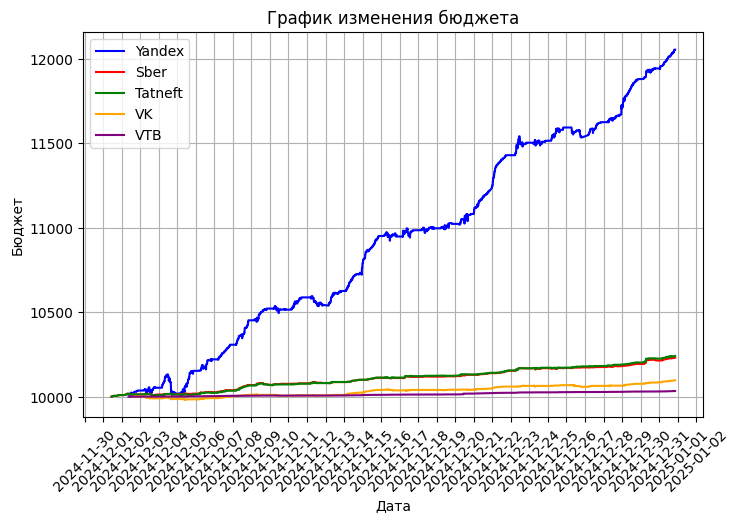

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Построение графика
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(dates[0], history[0], color='b', label="Yandex")
ax.plot(dates[1], history[1], color='r', label="Sber")
ax.plot(dates[2], history[2], color='g', label="Tatneft")
ax.plot(dates[3], history[3], color='orange', label="VK")
ax.plot(dates[4], history[4], color='purple', label="VTB")


# Форматирование оси X
ax.xaxis.set_major_locator(mdates.DayLocator())  # Отображаем каждую дату
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Формат меток
plt.xticks(rotation=45)  # Наклон подписей для читаемости

ax.set_xlabel("Дата")
ax.set_ylabel("Бюджет")
ax.set_title("График изменения бюджета")
ax.legend()
plt.grid()
plt.show()


In [ ]:

history_yandex, X_test_yandex = model.test_trading(df = data.df, 
                   start_date=dt.datetime(2024, 11, 1),
                   train_size=1000, val_size=500, test_size=500,
                   cat = cat, num=numeric)

NameError: name 'dates' is not defined

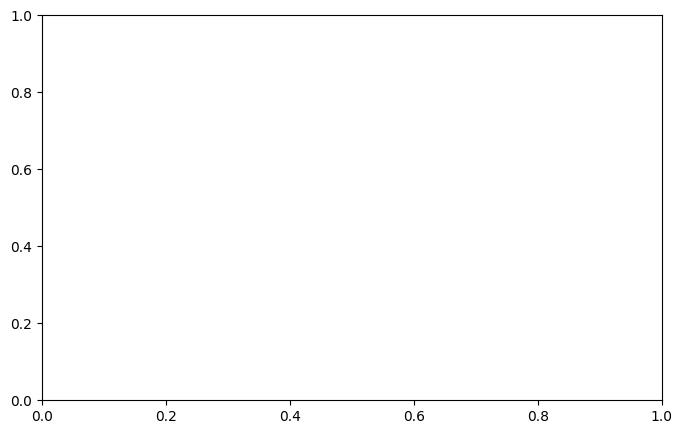

In [10]:
# Построение графика
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(dates, history, marker='o', label='История бюджета', color='b')

# Форматирование оси X
ax.xaxis.set_major_locator(mdates.DayLocator())  # Отображаем каждую дату
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Формат меток
plt.xticks(rotation=45)  # Наклон подписей для читаемости

ax.set_xlabel("Дата")
ax.set_ylabel("Бюджет")
ax.set_title("График изменения бюджета")
ax.legend()
plt.grid()
plt.show()

In [9]:
stop

NameError: name 'stop' is not defined

In [153]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

model.fit()

0:	learn: 0.6905880	test: 0.6910328	best: 0.6910328 (0)	total: 6.93ms	remaining: 1m 9s
1:	learn: 0.6885286	test: 0.6892578	best: 0.6892578 (1)	total: 13.1ms	remaining: 1m 5s
2:	learn: 0.6864778	test: 0.6874138	best: 0.6874138 (2)	total: 19.1ms	remaining: 1m 3s
3:	learn: 0.6846002	test: 0.6856496	best: 0.6856496 (3)	total: 25.4ms	remaining: 1m 3s
4:	learn: 0.6828792	test: 0.6843867	best: 0.6843867 (4)	total: 32.8ms	remaining: 1m 5s
5:	learn: 0.6809134	test: 0.6826386	best: 0.6826386 (5)	total: 41.1ms	remaining: 1m 8s
6:	learn: 0.6792314	test: 0.6813111	best: 0.6813111 (6)	total: 49.7ms	remaining: 1m 10s
7:	learn: 0.6776350	test: 0.6799152	best: 0.6799152 (7)	total: 56.8ms	remaining: 1m 10s
8:	learn: 0.6762893	test: 0.6786992	best: 0.6786992 (8)	total: 64.9ms	remaining: 1m 12s
9:	learn: 0.6747874	test: 0.6773846	best: 0.6773846 (9)	total: 71.7ms	remaining: 1m 11s
10:	learn: 0.6732553	test: 0.6759247	best: 0.6759247 (10)	total: 81ms	remaining: 1m 13s
11:	learn: 0.6718286	test: 0.6746366	b

In [ ]:
model.test_trading()

In [154]:
model.score(X_val, y_val)

{'0': {'precision': 0.655688622754491,
  'recall': 0.773851590106007,
  'f1-score': 0.7098865478119936,
  'support': 283.0},
 '1': {'precision': 0.6144578313253012,
  'recall': 0.4700460829493088,
  'f1-score': 0.5326370757180157,
  'support': 217.0},
 'accuracy': 0.642,
 'macro avg': {'precision': 0.6350732270398961,
  'recall': 0.6219488365276579,
  'f1-score': 0.6212618117650046,
  'support': 500.0},
 'weighted avg': {'precision': 0.6377944592742226,
  'recall': 0.642,
  'f1-score': 0.6329602769232072,
  'support': 500.0}}

In [158]:
model.print_constant_accuracy(y_val)

TypeError: CatboostFinModel.get_constant_accuracy_params() missing 1 required positional argument: 'y_test'

In [23]:
stop

NameError: name 'stop' is not defined

In [9]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

num = data.numeric_features

KeyboardInterrupt: 

In [34]:
data = FinData("./datasets/T_yandex_10min.csv")

FileNotFoundError: [Errno 2] No such file or directory: './datasets/T_yandex_10min.csv'

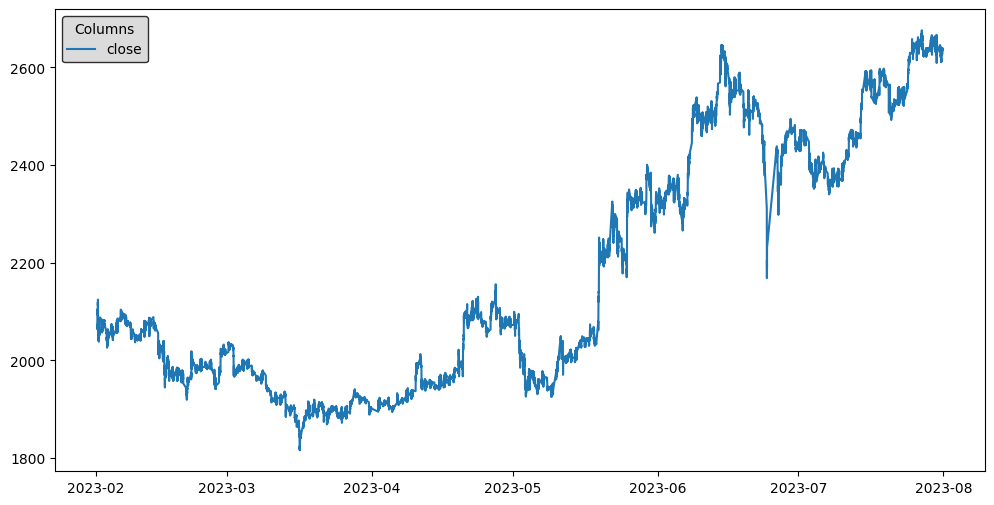

In [63]:
data.visualize_time_frame(datetime_start=dt.datetime(2023, 2, 1), 
                          datetime_end=dt.datetime(2023, 8, 1), 
                          columns=["close"])

In [35]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

num = data.numeric_features

In [71]:
X_train, X_val, X_test, y_train, y_val, y_test = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100, 
                                                            num_test_candles=10,
                                                            numeric=num, target="direction_binary")

In [72]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [73]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

In [74]:
model.fit()

0:	learn: 0.6925929	test: 0.6925559	best: 0.6925559 (0)	total: 40.6ms	remaining: 6m 45s
1:	learn: 0.6920052	test: 0.6919253	best: 0.6919253 (1)	total: 71.6ms	remaining: 5m 57s
2:	learn: 0.6914427	test: 0.6913161	best: 0.6913161 (2)	total: 104ms	remaining: 5m 47s
3:	learn: 0.6909383	test: 0.6906975	best: 0.6906975 (3)	total: 124ms	remaining: 5m 9s
4:	learn: 0.6904553	test: 0.6901242	best: 0.6901242 (4)	total: 137ms	remaining: 4m 34s
5:	learn: 0.6899637	test: 0.6895401	best: 0.6895401 (5)	total: 154ms	remaining: 4m 15s
6:	learn: 0.6895067	test: 0.6890600	best: 0.6890600 (6)	total: 168ms	remaining: 4m
7:	learn: 0.6890366	test: 0.6886136	best: 0.6886136 (7)	total: 184ms	remaining: 3m 49s
8:	learn: 0.6885952	test: 0.6881648	best: 0.6881648 (8)	total: 201ms	remaining: 3m 43s
9:	learn: 0.6881397	test: 0.6876859	best: 0.6876859 (9)	total: 226ms	remaining: 3m 45s
10:	learn: 0.6877071	test: 0.6872034	best: 0.6872034 (10)	total: 251ms	remaining: 3m 47s
11:	learn: 0.6872664	test: 0.6867873	best: 0

In [75]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.63      0.73      0.67       255
           1       0.66      0.55      0.60       245

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



In [76]:
model.print_constant_accuracy(y_val)

Точность константного предсказания 0.51


In [78]:
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.68      0.56      0.61        27
           1       0.57      0.70      0.63        23

    accuracy                           0.62        50
   macro avg       0.63      0.63      0.62        50
weighted avg       0.63      0.62      0.62        50



In [77]:
model.print_constant_accuracy(y_test)

Точность константного предсказания 0.54


In [15]:
model.print_feature_importances()

0.41570612919594147 close_norms_5
0.4842763296111416 close_high_norms_3
0.5071528044858322 close_norms_3
0.5154882672499465 close_high_norms_5
0.5366270803195864 low_normed_ma_30
0.5669775175464331 rsi_3
0.5757824170118958 close_norms_6
0.624031574107176 rsi_18
0.6308435277583216 close_high_norms_4
0.640610348922762 close_high_norms_6
0.6569108262996001 low_normed_ma_18
0.6684060232484462 SD
0.6832865997035814 low_normed_ma_16
0.7009132065731948 high_normed_ma_30
0.707304389010009 stochastic_oscillator_ma_3
0.7225530341801787 close_norms_4
0.7287551045453653 low_normed_ma_50
0.7846472366151499 hl_diff_18
0.8140957648881243 high_normed_ma_16
0.8448118039898598 stochastic_oscillator_ma_6
0.8472764573178154 close_normed_ema_35
0.8475004580620309 close_normed_ema_20
0.8651633878488233 low_norms_5
0.8703193689706923 low_normed_ma_8
0.9179909399013048 close_normed_ema_9
0.9254735586624364 close_normed_hl_diff_18
0.9605589897462601 close_normed_rsi_18
0.9742029305466688 high_norms_3
0.9831549

In [80]:
X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            numeric=num, target="direction_binary")

In [81]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [ ]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

model.fit()

0:	learn: 0.6914515	test: 0.6921945	best: 0.6921945 (0)	total: 17.8ms	remaining: 2m 57s
1:	learn: 0.6898127	test: 0.6912502	best: 0.6912502 (1)	total: 34.2ms	remaining: 2m 51s
2:	learn: 0.6882563	test: 0.6902019	best: 0.6902019 (2)	total: 46.9ms	remaining: 2m 36s
3:	learn: 0.6869327	test: 0.6892330	best: 0.6892330 (3)	total: 64.1ms	remaining: 2m 40s
4:	learn: 0.6856835	test: 0.6884049	best: 0.6884049 (4)	total: 80.3ms	remaining: 2m 40s
5:	learn: 0.6843720	test: 0.6877614	best: 0.6877614 (5)	total: 101ms	remaining: 2m 47s
6:	learn: 0.6833121	test: 0.6869967	best: 0.6869967 (6)	total: 120ms	remaining: 2m 51s
7:	learn: 0.6822457	test: 0.6862154	best: 0.6862154 (7)	total: 137ms	remaining: 2m 50s
8:	learn: 0.6813612	test: 0.6854452	best: 0.6854452 (8)	total: 153ms	remaining: 2m 49s
9:	learn: 0.6803414	test: 0.6846276	best: 0.6846276 (9)	total: 170ms	remaining: 2m 50s
10:	learn: 0.6794379	test: 0.6840563	best: 0.6840563 (10)	total: 188ms	remaining: 2m 50s
11:	learn: 0.6786232	test: 0.6833459

In [83]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67       262
           1       0.63      0.48      0.55       238

    accuracy                           0.62       500
   macro avg       0.62      0.61      0.61       500
weighted avg       0.62      0.62      0.61       500



In [ ]:
model.print_constant_accuracy(y_val)

Точность константного предсказания 0.524


In [ ]:
X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            numeric=num, target="direction_binary")

numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'CrossEntropy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}


model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

model.fit()

0:	learn: 0.6914515	test: 0.6921945	best: 0.6921945 (0)	total: 17.6ms	remaining: 2m 56s
1:	learn: 0.6898127	test: 0.6912502	best: 0.6912502 (1)	total: 33ms	remaining: 2m 45s
2:	learn: 0.6882563	test: 0.6902019	best: 0.6902019 (2)	total: 45.4ms	remaining: 2m 31s
3:	learn: 0.6869327	test: 0.6892330	best: 0.6892330 (3)	total: 58.3ms	remaining: 2m 25s
4:	learn: 0.6856835	test: 0.6884049	best: 0.6884049 (4)	total: 70.9ms	remaining: 2m 21s
5:	learn: 0.6843720	test: 0.6877614	best: 0.6877614 (5)	total: 88.3ms	remaining: 2m 27s
6:	learn: 0.6833121	test: 0.6869967	best: 0.6869967 (6)	total: 100ms	remaining: 2m 23s
7:	learn: 0.6822457	test: 0.6862154	best: 0.6862154 (7)	total: 117ms	remaining: 2m 25s
8:	learn: 0.6813612	test: 0.6854452	best: 0.6854452 (8)	total: 132ms	remaining: 2m 26s
9:	learn: 0.6803414	test: 0.6846276	best: 0.6846276 (9)	total: 150ms	remaining: 2m 29s
10:	learn: 0.6794379	test: 0.6840563	best: 0.6840563 (10)	total: 167ms	remaining: 2m 31s
11:	learn: 0.6786232	test: 0.6833459	

In [90]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67       262
           1       0.63      0.48      0.55       238

    accuracy                           0.62       500
   macro avg       0.62      0.61      0.61       500
weighted avg       0.62      0.62      0.61       500



In [91]:
from model.preprocessing import Scaler, scale_num_data

X_train, X_val = scale_num_data(X_train, [X_train, X_val], numeric=numeric, scaler=Scaler.Standard)

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\myenv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [47]:
X_train, X_val, X_test, y_train, y_val, y_test = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            num_test_candles=10, 
                                                            numeric=num, target="direction_binary")

In [51]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [52]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

In [53]:
model.fit()

0:	learn: 0.6914166	test: 0.6927015	best: 0.6927015 (0)	total: 28.7ms	remaining: 4m 47s
1:	learn: 0.6896763	test: 0.6923796	best: 0.6923796 (1)	total: 51.1ms	remaining: 4m 15s
2:	learn: 0.6881918	test: 0.6920846	best: 0.6920846 (2)	total: 79.2ms	remaining: 4m 23s
3:	learn: 0.6868302	test: 0.6918524	best: 0.6918524 (3)	total: 103ms	remaining: 4m 18s
4:	learn: 0.6855642	test: 0.6915631	best: 0.6915631 (4)	total: 131ms	remaining: 4m 21s
5:	learn: 0.6842659	test: 0.6912089	best: 0.6912089 (5)	total: 150ms	remaining: 4m 9s
6:	learn: 0.6831511	test: 0.6909873	best: 0.6909873 (6)	total: 170ms	remaining: 4m 3s
7:	learn: 0.6820492	test: 0.6907310	best: 0.6907310 (7)	total: 187ms	remaining: 3m 53s
8:	learn: 0.6811559	test: 0.6905707	best: 0.6905707 (8)	total: 214ms	remaining: 3m 58s
9:	learn: 0.6801563	test: 0.6903042	best: 0.6903042 (9)	total: 241ms	remaining: 4m
10:	learn: 0.6792393	test: 0.6902053	best: 0.6902053 (10)	total: 267ms	remaining: 4m 2s
11:	learn: 0.6784563	test: 0.6900574	best: 0.

In [82]:
model.score(X_val, y_val)["accuracy"]

0.64

In [167]:
model.get_constant_accuracy(y_val)

0.566

In [168]:
model.get_constant_accuracy(y_val, unknown=True)

0.566

In [ ]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

In [36]:
np.mean([1,2, 3, 4])

2.5

In [4]:
cat=[]

In [7]:
args = {"iterations" : 5000, 
       "depth" : 5, 
       "learning_rate" : 0.01, 
       "use_best_model" : True, 
       "l2_leaf_reg" : 200,
       "loss_function" : 'Logloss', 
       "eval_metric" : 'Logloss', 
       "verbose" : 0, 
       "cat_features" : cat, 
       "random_state" : 42,
       "early_stopping_rounds" : 1000}

d = {"OIL_GAS" : ['Rosneft', 'Bashneft', 'Lukoil', 'Gazprom', 'Tatneft', 'Novatek'],
    "STEEL" : ['NLMK', 'MMK', 'Severstal', 'Mechel'],
    "NON_FERROUS_METALS" : ['Nornickel', 'Rusal'],
    "COMMUNICATION" : ['Yandex', 'MTS', 'Rostelekom', 'VK', 'T', 'Positive'],
    "FINANCE" : ['Sber', 'T', 'Moex', 'VTB']}

d_ans = {"OIL_GAS" : 0,
    "STEEL" : 0,
    "NON_FERROUS_METALS" : 0,
    "COMMUNICATION" : 0,
    "FINANCE" : 0}

windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]

def make_rel_path(name):
    return f"../../datasets/{name}_10_min.csv"

for category in list(d.keys()):
    dfs = d[category]
    norm = len(dfs)
    print(category)
    accs = []
    for df in dfs:
        print(df)
        data = FinData(make_rel_path(df))
        data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
        data.insert_rolling_means(windows_ma=windows_ma)
        data.insert_exp_rolling_means(windows_ema=windows_ema)
        data.insert_bollinger()
        data.insert_rsi()
        data.insert_high_low_diff()
        data.insert_stochastic_oscillator()
        num = data.get_numeric_features()
        cat = data.get_cat_features()
        X_train, X_val, X_test, y_train, y_val, y_test = train_valid_test_split(data.df, 
                                                                                start_period=dt.datetime(2024, 11, 1), 
                                                                                train_size=3000, 
                                                                                val_size=200, 
                                                                                test_size=100, cat=cat, numeric=num, target="direction_binary")
        
        model = CatboostFinModel(args = args)
        model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
        model.set_features(numeric_features=num, cat_features=cat)
        model.fit()
        accs.append(model.score(X_test, y_test, output_dict=True)["accuracy"])
    
    d_ans[category] = np.mean(accs)


OIL_GAS
Rosneft
Bashneft
Lukoil
Gazprom
Tatneft
Novatek
STEEL
NLMK
MMK
Severstal
Mechel
NON_FERROUS_METALS
Nornickel
Rusal
COMMUNICATION
Yandex
MTS
Rostelekom
VK
T
Positive
FINANCE
Sber
T
Moex
VTB


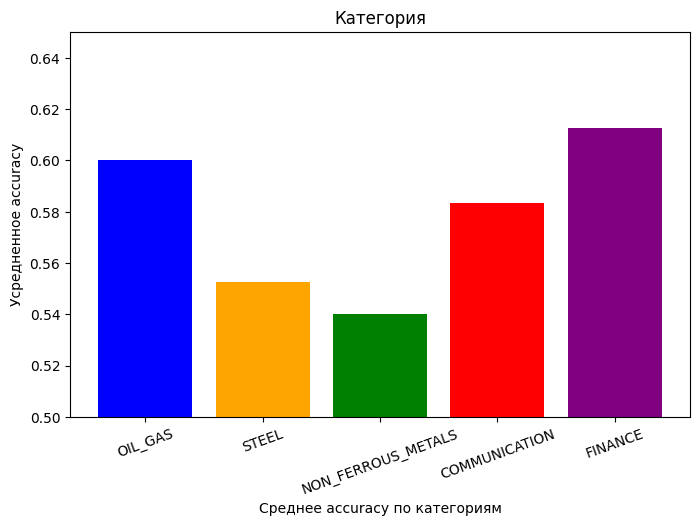

In [11]:
import matplotlib.pyplot as plt

# Данные
data = d_ans

# Построение графика
plt.figure(figsize=(8, 5))
plt.bar(data.keys(), data.values(), color=['blue', 'orange', 'green', 'red', 'purple'])

# Подписи
plt.xlabel("Среднее accuracy по категориям")
plt.ylabel("Усредненное accuracy")
plt.title("Категория")
plt.xticks(rotation=20)  # Поворачиваем подписи для читаемости
plt.ylim(0.5, 0.65)  # Устанавливаем границы по оси Y

# Отображение графика
plt.show()


In [125]:
dfs = ["../../datasets/Sber_10_min.csv", 
       "../../datasets/T_yandex_10min.csv", 
       "../../datasets/Positive_10_min.csv", 
       "../../datasets/Moex_10_min.csv", 
       "../../datasets/Gazprom_10_min.csv", 
       "../../datasets/Nornickel_10_min.csv", 
       "../../datasets/Novatek_10_min.csv", 
       "../../datasets/Phosagro_10_min.csv", 
       "../../datasets/Tatneft_10_min.csv"]

args = {"iterations" : 10000, 
       "depth" : 5, 
       "learning_rate" : 0.03, 
       "use_best_model" : True, 
       "l2_leaf_reg" : 200,
       "loss_function" : 'Logloss', 
       "eval_metric" : 'Logloss', 
       "cat_features" : cat, 
       "random_state" : 42,
       "early_stopping_rounds" : 1000}

windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]

constant_accuracies = []
accuracies_val = []
accuracies_test = []

for dataset_path in dfs:
       data = FinData(dataset_path)
       data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
       data.insert_rolling_means(windows_ma=windows_ma)
       data.insert_exp_rolling_means(windows_ema=windows_ema)
       data.insert_bollinger()
       data.insert_rsi()
       data.insert_high_low_diff()
       data.insert_stochastic_oscillator()
       data.insert_random_prediction()
       X_train, X_val, X_test, y_train, y_val, y_test = merged_split(data=data.df, start_data=dt.datetime(2024, 11, 1), 
                                                            num_train_candles=700, 
                                                            num_valid_candles=100,
                                                            num_test_candles=100, 
                                                            numeric=num, target="direction_binary")
       numeric = data.get_numeric_features()
       cat = data.get_cat_features()
       
       model = CatboostFinModel(args = args)

       model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
       model.set_features(numeric_features=numeric, cat_features=cat)
       model.fit()
       accuracies_test.append(model.score(X_test, y_test, output_dict=True)["accuracy"])
       accuracies_val.append(model.score(X_val, y_val, output_dict=True)["accuracy"])
       constant_accuracies.append(model.get_constant_accuracy(y_test))

              

0:	learn: 0.6910921	test: 0.6908304	best: 0.6908304 (0)	total: 13.1ms	remaining: 2m 10s
1:	learn: 0.6889518	test: 0.6879533	best: 0.6879533 (1)	total: 23.5ms	remaining: 1m 57s
2:	learn: 0.6869455	test: 0.6852133	best: 0.6852133 (2)	total: 31ms	remaining: 1m 43s
3:	learn: 0.6854324	test: 0.6834346	best: 0.6834346 (3)	total: 39.5ms	remaining: 1m 38s
4:	learn: 0.6840142	test: 0.6814510	best: 0.6814510 (4)	total: 45.4ms	remaining: 1m 30s
5:	learn: 0.6825352	test: 0.6794308	best: 0.6794308 (5)	total: 53.5ms	remaining: 1m 29s
6:	learn: 0.6808738	test: 0.6772437	best: 0.6772437 (6)	total: 60.2ms	remaining: 1m 25s
7:	learn: 0.6793723	test: 0.6751618	best: 0.6751618 (7)	total: 66.8ms	remaining: 1m 23s
8:	learn: 0.6784584	test: 0.6738575	best: 0.6738575 (8)	total: 74ms	remaining: 1m 22s
9:	learn: 0.6770491	test: 0.6720022	best: 0.6720022 (9)	total: 81.2ms	remaining: 1m 21s
10:	learn: 0.6757750	test: 0.6701940	best: 0.6701940 (10)	total: 90.8ms	remaining: 1m 22s
11:	learn: 0.6748353	test: 0.66936

In [126]:
print(type(constant_accuracies[0]), type(accuracies_val[0]), type(accuracies_test[0]))

<class 'float'> <class 'float'> <class 'float'>


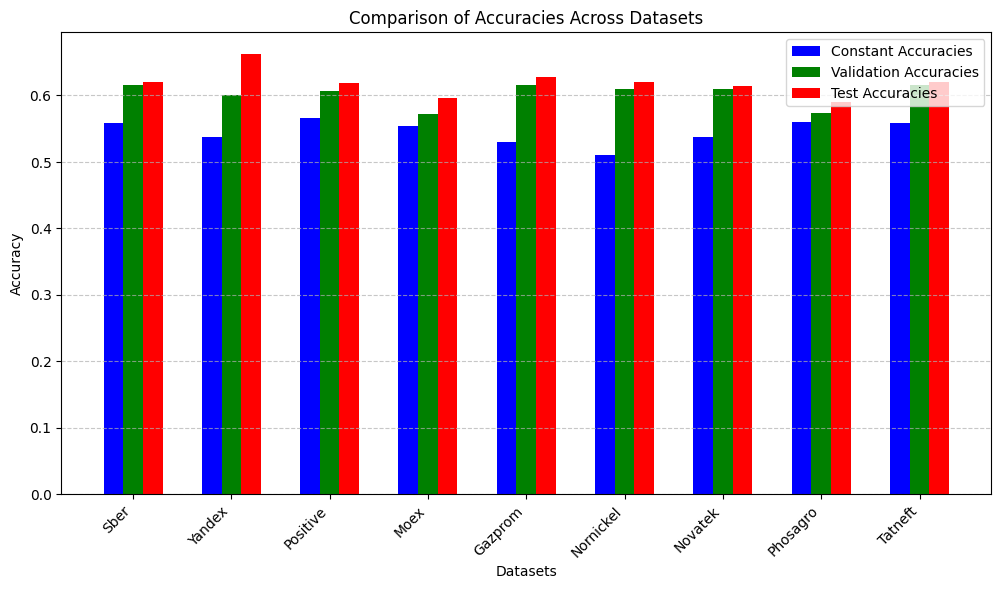

In [127]:
import numpy as np
import matplotlib.pyplot as plt


dfs = ["Sber", "Yandex", "Positive", "Moex", "Gazprom", "Nornickel", "Novatek", "Phosagro", "Tatneft"]

# Ширина одного столбца
bar_width = 0.2

# Позиции для каждого столбца
x = np.arange(len(dfs))

plt.figure(figsize=(12, 6))

# Отрисовка барплотов
plt.bar(x - bar_width, constant_accuracies, width=bar_width, label='Constant Accuracies', color='blue')
plt.bar(x, accuracies_val, width=bar_width, label='Validation Accuracies', color='green')
plt.bar(x + bar_width, accuracies_test, width=bar_width, label='Test Accuracies', color='red')

# Настройки осей
plt.xticks(ticks=x, labels=dfs, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.xlabel('Datasets')
plt.title('Comparison of Accuracies Across Datasets')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
dfs = ["./datasets/Sber_10_min.csv", 
       "./datasets/T_yandex_10min.csv", 
       "./datasets/Positive_10_min.csv", 
       "./datasets/Moex_10_min.csv", 
       "./datasets/Gazprom_10_min.csv"]

args = {"iterations" : 10000, 
       "depth" : 5, 
       "learning_rate" : 0.03, 
       "use_best_model" : True, 
       "l2_leaf_reg" : 200,
       "loss_function" : 'Logloss', 
       "eval_metric" : 'Logloss', 
       "cat_features" : cat, 
       "random_state" : 42,
       "early_stopping_rounds" : 2000}

windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]

valid_candles_nums = [400, 350, 300, 250, 200, 150, 100, 50]

for dataset_path in dfs:
       data = FinData(dataset_path)
       data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
       data.insert_rolling_means(windows_ma=windows_ma)
       data.insert_exp_rolling_means(windows_ema=windows_ema)
       data.insert_bollinger()
       data.insert_rsi()
       data.insert_high_low_diff()
       data.insert_stochastic_oscillator()
       data.insert_random_prediction()
       for vcn in valid_candles_nums:
              X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            numeric=num, target="direction_binary")
              
              numeric = data.get_numeric_features()
              cat = data.get_cat_features()
              
              model = CatboostFinModel(args = args)

              model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
              model.set_features(numeric_features=numeric, cat_features=cat)
              model.fit()
              


    

In [35]:
import numpy as np

# Пример матрицы
A = np.array([[10, 20, 5],
              [30, 15, 25],
              [40, 50, 35],
              [60, 70, 45]])

k = 2  # Количество наибольших элементов

# Получаем индексы k наибольших элементов в каждом столбце
idx = np.argpartition(A, -k, axis=0)[-k:]

# Получаем значения k наибольших элементов
top_k_values = np.take_along_axis(A, idx, axis=0)

print("Индексы:")
print(idx)
print("Значения:")
print(top_k_values)

np.sum(top_k_values)


Индексы:
[[2 2 2]
 [3 3 3]]
Значения:
[[40 50 35]
 [60 70 45]]


300

In [172]:
d = {"ema" : 2000, "ma" : 3000}

list(d.keys())

['ema', 'ma']

In [175]:
a = [1, 2, 3, 4]
a[:-1]

[1, 2, 3]